# Market Intelligence

In [1]:
from src.Form10k import Form10kAnalyzer, Form10kExtractor, clean_text
import streamlit as st
import pandas as pd

Importing Dependancies
Completed Imports


In [2]:
section = 'Risk Factors'

myform = Form10kExtractor(download_path = r"documentRepo", company = "Apple Inc.", section = section ,is_ticker = False)
myformanalysis = Form10kAnalyzer(myform)

Extracting Report
Extracting Section
sections extracted!
Unable to indentify individual headers. Extracting each paragraph as a subsection instead
subsections extracted!
Entities extracted!
Sentiment extracted


In [3]:
subsection_sentiment_df = pd.DataFrame(zip(myform.subsections_, myformanalysis.subsections_sentiment_polarity_, myformanalysis.subsections_sentiment_subjectivity_), 
columns = ['Risk Factor', 'Sentiment - Polarity', 'Sentimeny - Subjectivity'])

In [4]:
entities_label_df = pd.DataFrame(zip(myformanalysis.entities_text_,myformanalysis.entities_label_), columns=['Entity','Label'])
entities_label_count_df = pd.DataFrame(entities_label_df.value_counts(), columns=['# of Occurances']).reset_index()

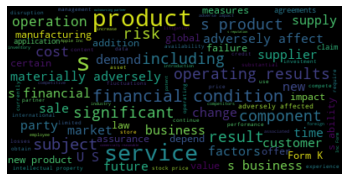

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=30, stopwords = myformanalysis.entities_text_ + list(myform.nlp.Defaults.stop_words)).generate_from_text(myform.text_section_)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()